## ISYE6501x Homework 3

### Installing Packages and Loading Libraries

In [1]:
options(warn=-1) #suppressing warnings

In [2]:
install.packages("outliers")

Installing package into 'C:/Users/fayal/R/win-library/3.6'
(as 'lib' is unspecified)


package 'outliers' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\fayal\AppData\Local\Temp\RtmpuWldb2\downloaded_packages


In [3]:
install.packages("lubridate")

Installing package into 'C:/Users/fayal/R/win-library/3.6'
(as 'lib' is unspecified)


package 'lubridate' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\fayal\AppData\Local\Temp\RtmpuWldb2\downloaded_packages


In [4]:
library(outliers)

In [5]:
library(ggplot2)

In [6]:
library(tidyverse)

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v tibble  2.1.3     v dplyr   0.8.3
v tidyr   1.0.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
v purrr   0.3.3     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [11]:
library(repr)

In [28]:
library(reshape)


Attaching package: 'reshape'

The following object is masked from 'package:dplyr':

    rename

The following objects are masked from 'package:tidyr':

    expand, smiths



In [72]:
library(tidyr)

### Question 5.1
Using crime data , test to see whether there are any outliers in the last column (number of crimes per 100,000 people). Use the grubbs.test function in the outliers package in R.

In [15]:
#Loading data as a data frame
crime<-read_tsv("uscrime.txt")

Parsed with column specification:
cols(
  M = col_double(),
  So = col_double(),
  Ed = col_double(),
  Po1 = col_double(),
  Po2 = col_double(),
  LF = col_double(),
  M.F = col_double(),
  Pop = col_double(),
  NW = col_double(),
  U1 = col_double(),
  U2 = col_double(),
  Wealth = col_double(),
  Ineq = col_double(),
  Prob = col_double(),
  Time = col_double(),
  Crime = col_double()
)


In [19]:
#Exploring the data
head(crime)

M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
15.1,1,9.1,5.8,5.6,0.510,95.0,33,30.1,0.108,4.1,3940,26.1,0.084602,26.2011,791
14.3,0,11.3,10.3,9.5,0.583,101.2,13,10.2,0.096,3.6,5570,19.4,0.029599,25.2999,1635
14.2,1,8.9,4.5,4.4,0.533,96.9,18,21.9,0.094,3.3,3180,25.0,0.083401,24.3006,578
13.6,0,12.1,14.9,14.1,0.577,99.4,157,8.0,0.102,3.9,6730,16.7,0.015801,29.9012,1969
14.1,0,12.1,10.9,10.1,0.591,98.5,18,3.0,0.091,2.0,5780,17.4,0.041399,21.2998,1234
12.1,0,11.0,11.8,11.5,0.547,96.4,25,4.4,0.084,2.9,6890,12.6,0.034201,20.9995,682


In [20]:
dim(crime)

[1] 47 16

    Variable	 	Description
    M		percentage of males aged 14–24 in total state population
    So		indicator variable for a southern state
    Ed		mean years of schooling of the population aged 25 years or over
    Po1		per capita expenditure on police protection in 1960
    Po2		per capita expenditure on police protection in 1959
    LF		labour force participation rate of civilian urban males in the age-group 14-24
    M.F		number of males per 100 females
    Pop		state population in 1960 in hundred thousands
    NW		percentage of nonwhites in the population
    U1		unemployment rate of urban males 14–24
    U2		unemployment rate of urban males 35–39
    Wealth	wealth: median value of transferable assets or family income
    Ineq	income inequality: percentage of families earning below half the median income
    Prob	probability of imprisonment: ratio of number of commitments to number of offenses
    Time	average time in months served by offenders in state prisons before their first release
    Crime	crime rate: number of offenses per 100,000 population in 1960

In [21]:
#Summary of crime rate
summary(crime$Crime)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  342.0   658.5   831.0   905.1  1057.5  1993.0 

We can use visualization to see if there is any outliers in crime rate data:

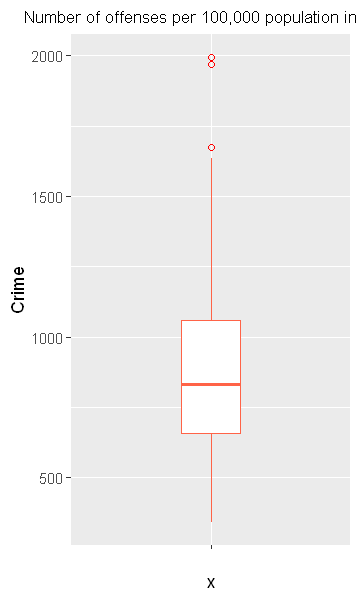

In [23]:
options(repr.plot.width=3, repr.plot.height=5)

ggplot(crime, aes(x="",y=Crime))+
geom_boxplot(width=0.25,outlier.color="red",outlier.shape = 1, color = "tomato")+
labs(title="Number of offenses per 100,000 population in 1960")+
theme(plot.title = element_text(hjust=0.5,lineheight=.8,size=10))

The above boxplot shows three points which are "too far away" from the range in which we expect them. 
Although, the plot shows these points as outliers, they are real data and valid observations.

We can also use Grubb's test.This test is defined for the hypothesis:
    H0 : There are no outliers in the data set
    Ha : The maximum and minimum values are outliers in the data set.

In [73]:
grubbs.test(crime$Crime,type=11,two.sided = TRUE) #type 11 is a test for two outliers on opposite tails


	Grubbs test for two opposite outliers

data:  crime$Crime
G = 4.26877, U = 0.78103, p-value < 2.2e-16
alternative hypothesis: 342 and 1993 are outliers


Using Grubb's test, a p-value bigger than 0.05 inidcated there is no evidence against a null hypothesis(The smaller the p-value, the stronger the evidence that you should reject the null hypothesis). So we reject alternate hypothesis and keep the null hypothesis that the maximum and minimum values are not outliers.

### Question 6.1
Describe a situation or problem from your job, everyday life, current events, etc., for which a Change Detection model would be appropriate. Applying the CUSUM technique, how would you choose the
critical value and the threshold?

**Answer:**

We can use CUSUM method for evaluating energy consumption in power grid.CUSUM control chart can be utilized to monitor energy usage data so that abnormal changes can be detected in a timely manner. 

Upon detecting the change, other techniques can be used to detect the cause of abnormal energy consumption such as performance degradation, poor maintenance or improper operation of systems.

### Question 6.2

**Part 1**:

Using July through October daily-high-temperature data for Atlanta for 1996 through 2015, use
a CUSUM approach to identify when unofficial summer ends (i.e., when the weather starts
cooling off) each year.

In [34]:
#Loading the data
temps=read_tsv("temps.txt")

Parsed with column specification:
cols(
  .default = col_double(),
  DAY = col_character()
)
See spec(...) for full column specifications.


In [32]:
#checking for NA/missing values in data frame
sum(is.na(temps))

[1] 0

In [33]:
#Exploring the data
tail(temps)[1:3,]

DAY,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
26-Oct,75,71,79,69,75,64,68,68,79,...,62,68,70,65,85,77,80,61,84,67
27-Oct,75,57,79,75,78,51,69,64,81,...,66,67,59,60,76,79,70,69,84,56
28-Oct,81,55,79,73,80,55,75,57,78,...,63,70,50,71,74,74,56,64,77,78


We can look at the changes using two approaches:

#### First approach:
we will look at average of temperature of each day taken from 1996 to 2015.
The goal is to observe, in average,  when the weather starts cooling down. 
Since the data includes 2 months of Summer and 1st month of Fall, the change indicates change of the season. 

In [35]:
#adding a column to data frame, with average value for each day
temps<-cbind(temps,rowMeans(temps[,-1]))

In [36]:
#renaming the column to Average
colnames(temps)[ncol(temps)] <- "Average"

In [38]:
#checking the data frame
head(temps)[1:3,]

DAY,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Average
1-Jul,98,86,91,84,89,84,90,73,82,...,95,85,95,87,92,105,82,90,85,88.85
2-Jul,97,90,88,82,91,87,90,81,81,...,85,87,90,84,94,93,85,93,87,88.35
3-Jul,97,93,91,87,93,87,87,87,86,...,82,91,89,83,95,99,76,87,79,88.40


Now, we calculate the CUSUM values using average temperatures:

In [39]:
#adding a col to temps data frame to store St value in each step
temps[,"St"]<-NA

In order to detect the shift from target,we define an "allowable slack" (C). This value is usually ½ or 1 standard deviation of the parameter. 

In [40]:
#Standard Deviation of the data points
std_sample<-sd(temps[,"Average"])

In [41]:
std_sample

[1] 6.701381

In [42]:
mean_sample<-mean(temps[,"Average"])

In [44]:
mean_sample

[1] 83.33902

In [45]:
#allowable slack C : typically set to 1 sigma
C<-std_sample

When the CUSUM value is at or more than **Threshold**, we say the process is “out of control” .  The standard practice is to set the threshold to 4 or 5 times the standard deviation. 

In [53]:
#threshold set to 5*sigma
T<-5*std_sample
T

[1] 33.5069

In [54]:
#using Zero start method

temps[1,"St"]<-0
for(i in 2:nrow(temps)){
    
    temps[i,"St"]<-max(0,(temps[i-1,"St"]+mean_sample-temps[i,"Average"]-C))
    
    
}

In [55]:
temps$St

[1]   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000
  [7]   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000
 [13]   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000
 [19]   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000
 [25]   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000
 [31]   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000
 [37]   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000
 [43]   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000
 [49]   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000
 [55]   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000
 [61]   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000
 [67]   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000
 [73]   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000
 [79]   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000
 [85]   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000
 [91]   0.2876435   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000
 [97]   0.0000000   0.2876435   1.3252870   3.1629306   5.5505741   7.0382176
[103]   7.8258611   8.6635046   9.8511481  12.2887917  16.0264352  20.0140787
[109]  23.5517222  28.2893657  33.8770092  39.2646528  41.8022963  46.0899398
[115]  53.0775833  60.8652268  68.1528704  73.3905139  81.1281574  89.1658009
[121]  96.4534444 102.0410879 108.1787315

In [61]:
cat("The day a change in trend is detected is:",temps[which(temps$St>T),"DAY"][1])

The day a change in trend is detected is: 19-Oct

In [62]:
temps[,"Date"]<-as.Date(temps[,"DAY"],"%d-%B")

In [63]:
temps[,"Date"]<-format(temps[,"Date"],format="%m/%d")

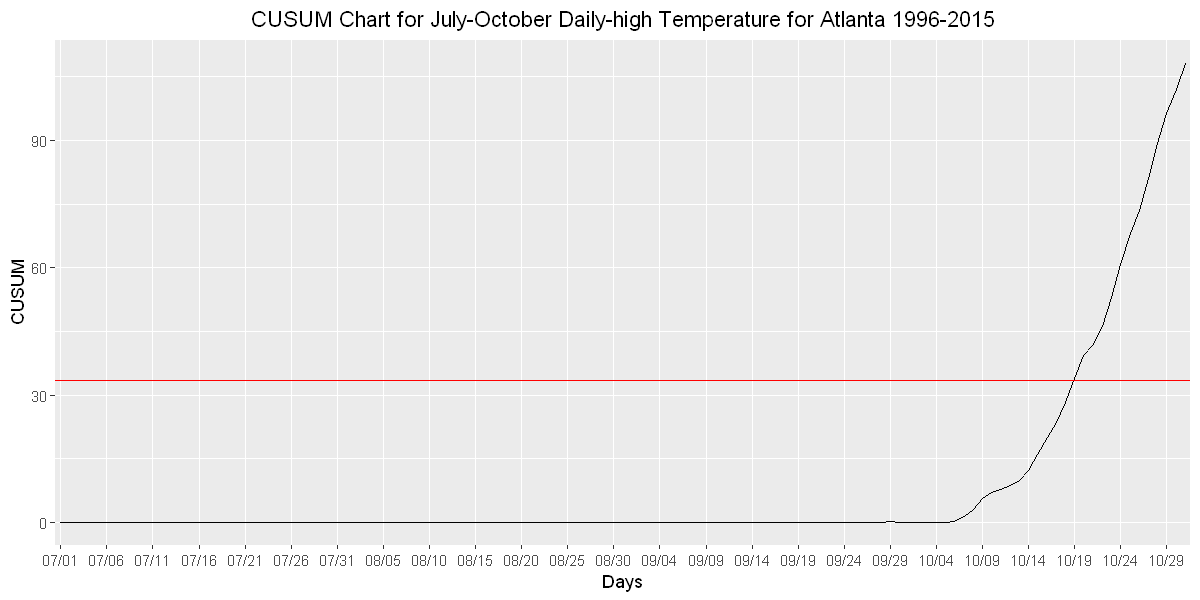

In [64]:
options(repr.plot.width=10, repr.plot.height=5)
ggplot(data = temps, aes(x = Date, y =`St`,group=2)) + 
  geom_line()+
  geom_hline(yintercept=T,color="red")+
 
  scale_x_discrete(breaks = unique(temps$Date)[seq(1,123,5)])+
  xlab("Days") +
  ylab("CUSUM") +
  ggtitle("CUSUM Chart for July-October Daily-high Temperature for Atlanta 1996-2015")+
  theme(plot.title = element_text(hjust = 0.5))



As we can also see in above visualization, in october 19th, the weather offically starts changing and it makes sense.Atlanta has humid subtropical climate with hot and long summers. Eventhough, the offical end day of summer is end of September, the weather does not cool down until end of October.

#### Second approach:
we will look at CUSUM for each year indivudually and look at the trend:

In [68]:
#creating a data frame to store the cusum values for each year
cusum_df<-data.frame(matrix(nrow=nrow(temps),ncol=length(1996:2015)+1))

In [69]:
#assigning columns names to cusum data frame
colnames(cusum_df)<-colnames(temps[,1:21])

In [70]:
#tidying up the Day and converting it to Date for ease of processing
cusum_df$DAY<-temps$Date

In [71]:
#using Zero start method
#calculating cusum values for each year
for(y in 2:ncol(cusum_df)){
    cusum_df[1,y]<-0 #initial St value for each column,set to zero
    mu<-mean(temps[,y]) #mean of each sample space(each year's observations)
    std<-sd(temps[,y]) #sd of each sample,also used as allowable slack
    threshold<-5*std #using 5 sd as threshold value,different T for each year 
    change<-NULL # to store dates with St over threshold,first value:first day change detected
    
    for(i in 2:nrow(cusum_df)){
        cusum_df[i,y]<-max(0,cusum_df[i-1,y]+(mu-temps[i,y]-std))
        if (cusum_df[i,y]>=threshold){
            change<-append(change,cusum_df[i,y])}}
    cat("In year of",colnames(cusum_df[y]),"the day Summer started is:",
        cusum_df[which(cusum_df[,y]==change[1]),"DAY"],"\n")
}

In year of 1996 the day Summer started is: 10/06 
In year of 1997 the day Summer started is: 10/19 
In year of 1998 the day Summer started is: 10/22 
In year of 1999 the day Summer started is: 10/23 
In year of 2000 the day Summer started is: 10/09 
In year of 2001 the day Summer started is: 10/28 
In year of 2002 the day Summer started is: 10/18 
In year of 2003 the day Summer started is: 10/11 
In year of 2004 the day Summer started is: 10/14 
In year of 2005 the day Summer started is: 10/25 
In year of 2006 the day Summer started is: 10/23 
In year of 2007 the day Summer started is: 10/26 
In year of 2008 the day Summer started is: 10/23 
In year of 2009 the day Summer started is: 10/17 
In year of 2010 the day Summer started is: 10/04 
In year of 2011 the day Summer started is: 10/23 
In year of 2012 the day Summer started is: 10/29 
In year of 2013 the day Summer started is: 10/23 
In year of 2014 the day Summer started is: 10/22 
In year of 2015 the day Summer started is: 10/29 


As we can observe,more or less,for each year, the weather offically starts cooling down toward end of October.

**Part 2**:

Use a CUSUM approach to make a judgment of whether Atlanta’s summer climate has gotten
warmer in that time (and if so, when).

**Answer:**
If we look at the result above, there is no strong evidence that summer is getting longer. For most years, fall starts after October 19th. If we want to dive deeper and investigate more, other methods might be more helpful.